In [12]:
import numpy
import torchvision

import torch
import torchvision.transforms.v2

transform = torchvision.transforms.v2.Compose([
    torchvision.transforms.v2.ToImage(),
    torchvision.transforms.v2.ToDtype(torch.float32, scale = True),
    torchvision.transforms.v2.Normalize(mean = torch.tensor([ 0.491, 0.482, 0.447 ]), std = torch.tensor([ 0.247, 0.244, 0.262 ]))
])

train = torchvision.datasets.CIFAR10('cifar-10', train = True, download = False, transform = transform)
test = torchvision.datasets.CIFAR10('cifar-10', train = False, download = False, transform = transform)

train_images = numpy.array([ numpy.array(item[0]) / 255 for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) / 255 for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

print(train_images.shape, test_images.shape)

(50000, 3, 32, 32) (10000, 3, 32, 32)


In [2]:
if False:
    import cvtda.topology
    extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = False)
    extractor = extractor.fit(train_images, "20/train")
    train_features = extractor.transform(train_images, "20/train")
    test_features = extractor.transform(test_images, "20/test")

    numpy.save("20/train_features.npy", train_features)
    numpy.save("20/test_features.npy", test_features)

In [14]:
train_features = numpy.load("20/train_features.npy")
test_features = numpy.load("20/test_features.npy")

train_features.shape, test_features.shape

((50000, 43103), (10000, 43103))

In [ ]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = True)
extractor = extractor.fit(train_images, "20/train")
train_diagrams = extractor.transform(train_images, "20/train")
test_diagrams = extractor.transform(test_images, "20/test")

In [5]:
import gc
gc.collect()

0

Trying KNeighborsClassifier - <cvtda.classification.NNClassifier.NNClassifier object at 0x000001BE41D67F40>


d:\Programs\Programming\Python\lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Parameters: 23620490


Epoch 0: 100%|██████████| 391/391 [01:11<00:00,  5.45it/s]


Epoch 0: {'loss': 100689.04650878906, 'val_acc': 0.3741}


Epoch 1: 100%|██████████| 391/391 [01:11<00:00,  5.49it/s]


Epoch 1: {'loss': 88299.69999694824, 'val_acc': 0.4047}


Epoch 2:   3%|▎         | 13/391 [00:02<01:13,  5.14it/s]


KeyboardInterrupt: 

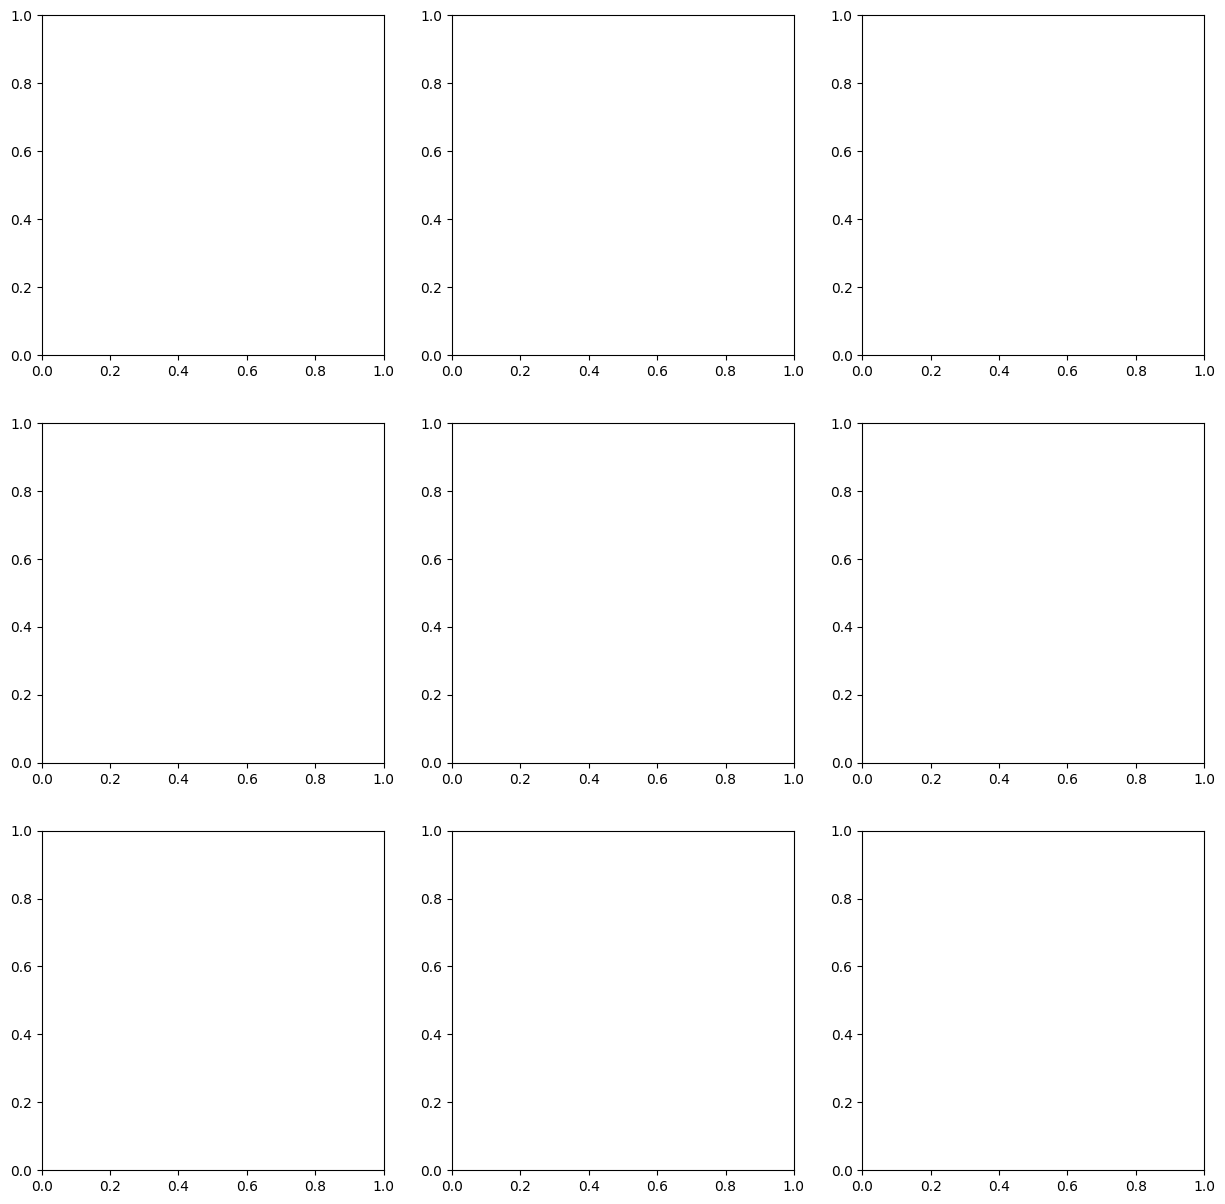

In [19]:
import cvtda.classification

cvtda.classification.classify(
    train_images, train_features, train_labels, [],
    test_images, test_features, test_labels, [],
    label_names = train.classes, # dump_name = "20/predictions",
    catboost_device = 'CPU'
)

In [1]:
import numpy
import torchvision

test = torchvision.datasets.CIFAR10('cifar-10', train = False, download = False)

test_images = numpy.array([ numpy.array(item[0]) / 255 for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

In [3]:
test.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [45]:
predictions = numpy.argmax(numpy.load("20/predictions/CatBoostClassifier.npy"), axis = 1)
part1 = numpy.where((predictions != test_labels) & numpy.isin(predictions, 1) & numpy.isin(test_labels, 9))[0]
print(part1)
len(part1)

[ 259  394  517  532  591  611  680  734  853  938 1064 1177 1222 1265
 1439 1563 1732 1808 1841 1927 2111 2126 2246 2355 2482 2568 2700 2954
 3166 3314 3358 3450 3501 3577 3676 3755 3770 3893 3973 4445 4449 4681
 4779 4929 4931 4952 5063 5067 5094 5192 5311 5416 5498 5521 5864 5939
 6095 6188 6290 6381 6983 7007 7113 7232 7444 7451 7492 7578 7826 7884
 7931 7942 7950 8057 8145 8272 8312 8385 8465 8506 8585 8742 9019 9067
 9069 9096 9209 9270 9403 9518 9708 9871]


92

In [46]:
list(part1[10:20]), list(part1[20:30]), list(part1[30:40]), list(part1[40:50])

([1064, 1177, 1222, 1265, 1439, 1563, 1732, 1808, 1841, 1927],
 [2111, 2126, 2246, 2355, 2482, 2568, 2700, 2954, 3166, 3314],
 [3358, 3450, 3501, 3577, 3676, 3755, 3770, 3893, 3973, 4445],
 [4449, 4681, 4779, 4929, 4931, 4952, 5063, 5067, 5094, 5192])

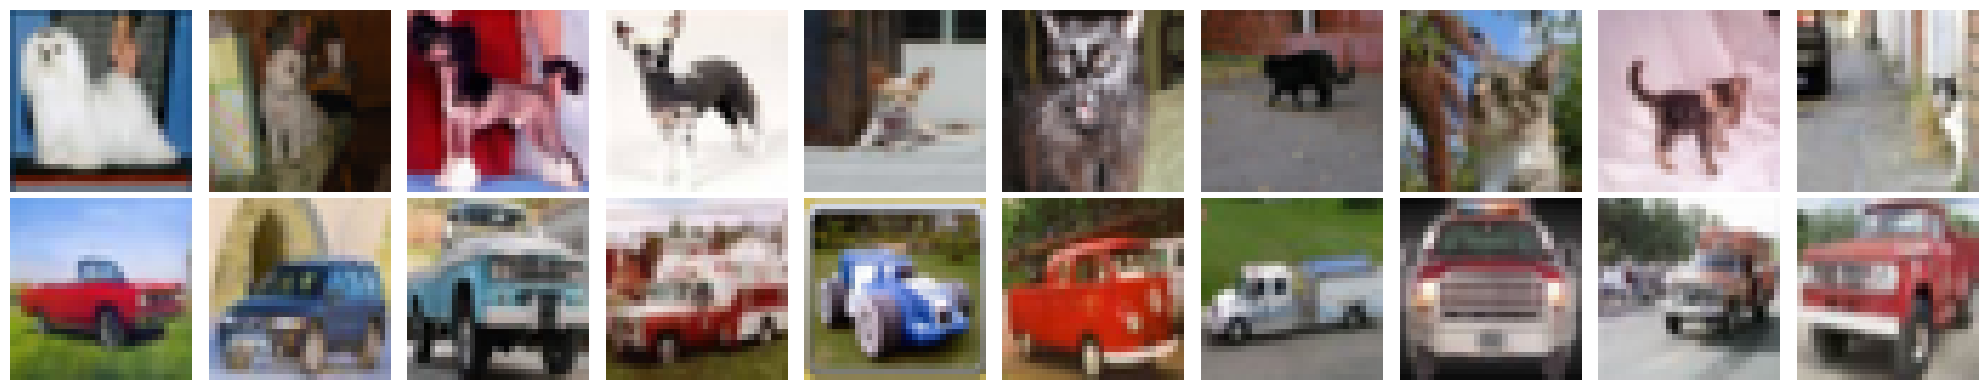

In [51]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(2, 10, figsize = (20, 4))

part1 = [ 549, 640, 1773, 2494, 3202, 1445, 1552, 1715, 2543, 3183 ]
for i in range(10):
    axes[0][i].imshow(test_images[part1[i]])
    axes[0][i].axis(False)

part2 = [ 2784, 2906, 3150, 3560, 5307, 1732, 1927, 3450, 4449, 4952 ]
for i in range(10):
    axes[1][i].imshow(test_images[part2[i]])
    axes[1][i].axis(False)

figure.tight_layout()

plt.savefig("20/predictions/error_examples.svg")
plt.savefig("20/predictions/error_examples.png")